In [1]:
import jax.numpy as jnp
from jax import grad, jacfwd
import jax.scipy as jsp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def myfunc2d(z0,z1,sigma,mu):
    return jnp.stack([jsp.special.ndtri(z0)*sigma + mu,jsp.special.ndtri(z1)*sigma + mu],axis=1)

In [3]:
dfunc2d_dmu = jacfwd(myfunc2d, argnums=3)

In [4]:
z0 = np.random.uniform(0,1,10000)
z1 = np.random.uniform(0,1,10000)

In [5]:
x2d = myfunc2d(z0,z1,1.,0.)

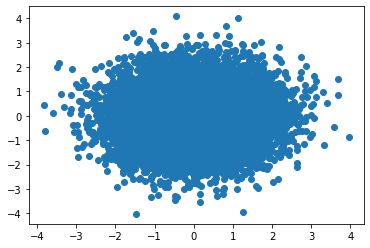

In [7]:
plt.scatter(x2d[:,0],x2d[:,1])

In [8]:
dx2d = dfunc2d_dmu(z0,z1,1.,0.)

In [9]:
target = np.random.normal(1,1,100000)

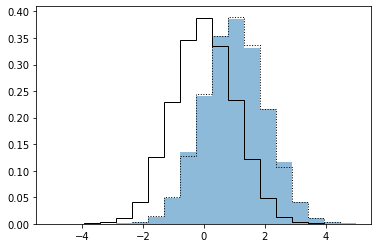

In [10]:
n,b,_=plt.hist(np.array(x2d[:,0]+dx2d[:,0]),bins=np.linspace(-5,5,20),density=True,alpha=0.5)
_=plt.hist(np.array(x2d[:,0]),bins=b,histtype="step",color="black",density=True)
nplot_=plt.hist(target,bins=b,histtype="step",color="black",ls=":",density=True)

Text(0, 0.5, '$y$')

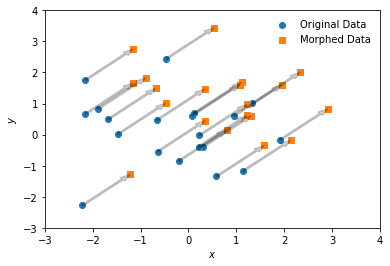

In [11]:
nplotm = 20
for i in range(nplotm):
    plt.arrow(x2d[:,0][i],x2d[:,1][i],dx2d[:,0][i],dx2d[:,1][i],width=0.05,color="black",alpha=0.2,length_includes_head=True) 
    pass
plt.scatter(x2d[:,0][0:nplotm],x2d[:,1][0:nplotm],label="Original Data",marker='o') 
plt.scatter(x2d[:,0][0:nplotm]+dx2d[:,0][0:nplotm],x2d[:,1][0:nplotm]+dx2d[:,1][0:nplotm],label="Morphed Data",marker='s')
plt.xlim([-3,4])
plt.ylim([-3,4])
plt.legend(frameon=False)
plt.xlabel("$x$")
plt.ylabel("$y$")

In [12]:
dfunc2d_dsigma = jacfwd(myfunc2d, argnums=2)

In [13]:
dx2ds = 0.5*dfunc2d_dsigma(z0,z1,1.,0.)

Text(0, 0.5, '$y$')

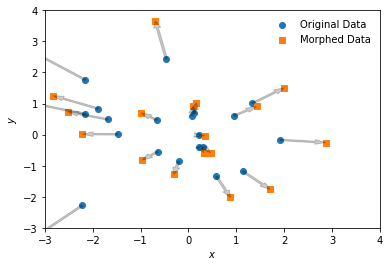

In [14]:
nplotm = 20
for i in range(nplotm):
    plt.arrow(x2d[:,0][i],x2d[:,1][i],dx2ds[:,0][i],dx2ds[:,1][i],width=0.05,color="black",alpha=0.2,length_includes_head=True) 
    pass
plt.scatter(x2d[:,0][0:nplotm],x2d[:,1][0:nplotm],label="Original Data",marker='o') 
plt.scatter(x2d[:,0][0:nplotm]+dx2ds[:,0][0:nplotm],x2d[:,1][0:nplotm]+dx2ds[:,1][0:nplotm],label="Morphed Data",marker='s')
plt.xlim([-3,4])
plt.ylim([-3,4])
plt.legend(frameon=False)
plt.xlabel("$x$")
plt.ylabel("$y$")

In [16]:
bmax = 4
def scatter_hist(x, dx, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    for i in range(nplotm):
        ax.arrow(x[:,0][i],x[:,1][i],dx[:,0][i],dx[:,1][i],width=0.05,color="black",alpha=0.2,length_includes_head=True) 
        pass
    ax.scatter(x[:,0][0:nplotm],x[:,1][0:nplotm],label="Original Data",marker='o') 
    ax.scatter(x[:,0][0:nplotm]+dx[:,0][0:nplotm],x[:,1][0:nplotm]+dx[:,1][0:nplotm],label="Morphed Data",marker='s')
    ax.set_xlim([-bmax,bmax*0.99])
    ax.set_ylim([-bmax,bmax*0.99])
    ax.set_xlabel("$X$",fontsize=20)
    ax.set_ylabel("$Y$",fontsize=20)
    
    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x[:,0], bins=np.linspace(-bmax,bmax,20),alpha=0.5,density=True,label="Original")
    ax_histy.hist(x[:,1], bins=np.linspace(-bmax,bmax,20), orientation='horizontal',alpha=0.5,density=True)
    ax_histx.hist(x[:,0]+dx[:,0], bins=np.linspace(-bmax,bmax,20),alpha=0.5,density=True,label="Moved")
    ax_histy.hist(x[:,1]+dx[:,1], bins=np.linspace(-bmax,bmax,20), orientation='horizontal',alpha=0.5,density=True)
    ax_histx.hist(y[:,0], bins=np.linspace(-bmax,bmax,20),histtype="step",color="black",density=True,label="Target")
    ax_histy.hist(y[:,1], bins=np.linspace(-bmax,bmax,20), orientation='horizontal',histtype="step",color="black",density=True)
    ax_histx.legend(fontsize=14,frameon=False,handlelength=0.7)
    
    ax_histx.set_ylabel("Normalized",fontsize=14)
    ax_histy.set_xlabel("Normalized",fontsize=14)

In [17]:
target_sig = np.stack([np.random.normal(0,1.5,100000),np.random.normal(0,1.5,100000)],axis=1)

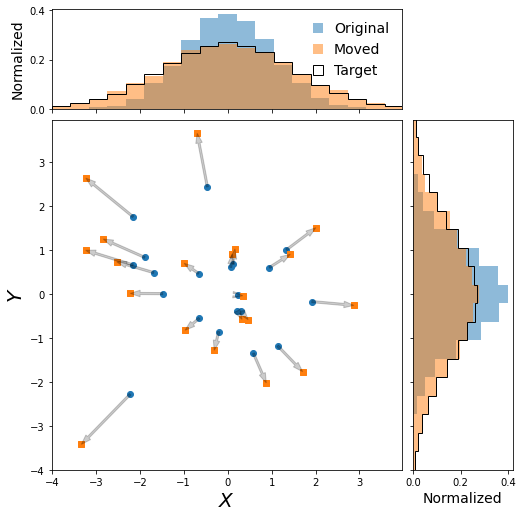

In [18]:
# start with a square Figure
fig = plt.figure(figsize=(8, 8))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
scatter_hist(np.array(x2d), np.array(dx2ds), target_sig, ax, ax_histx, ax_histy)

plt.show()
#fig.savefig("Gaussian.pdf",bbox_inches='tight')